# Random Forest Tuning

In [1]:
from sklearn.model_selection import train_test_split

from assignment_2.digits_classifiers.model import Dataset, ClassifierTuning
from assignment_2.digits_classifiers.classifiers import RandomForest
from assignment_2.digits_classifiers.io import read_datasets
from assignment_2.digits_classifiers.utils import chunks, plot_digit

## Import dataset

In [2]:
data = read_datasets()

2022-12-21 10:09:36.608 | INFO     | assignment_2.digits_classifiers.io:read_datasets:46 - Reading datasets


In [3]:
X, y = data

## Removing constant columns

In [4]:
#always_zero = [c for c in list(X.columns) if sum(X.loc[:, c]) == 0]

In [5]:
#X.drop(columns=always_zero, axis=1, inplace=True)

## Train Test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [7]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data = Dataset(x=X, y=y)
train = Dataset(x=X_train, y=y_train)
test = Dataset(x=X_test, y=y_test)

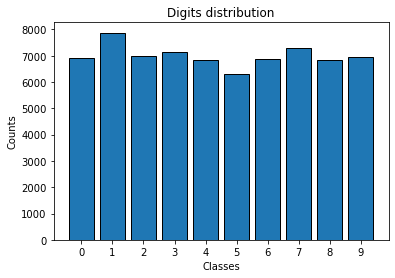

In [9]:
data.digit_distribution()

## Training Random Forest

In [10]:
forest = [
    RandomForest(train=train, test=test, params={"n_estimators": ne, "max_depth": md})
    for ne in [100, 1000, 3000]
    for md in [100, 300, 500]
]

Using small dimensionality for validation_train

In [11]:
_, X_train_cv, _, y_train_cv = train_test_split(X_train, y_train, test_size=0.40)
train_cv = Dataset(x=X_train_cv, y=y_train_cv)

In [12]:
tuning_forest = ClassifierTuning(classifiers=forest, base_estimator=RandomForest.default_estimator(), data=train_cv, k=10)
tuning_forest

[Estimator: RandomForestClassifier(); K: 10; Params: {'max_depth': [100, 500, 300], 'n_estimators': [1000, 100, 3000]}]

In [ ]:
%%time
tuning_forest.evaluate()

In [10]:
#best_forest = RandomForest(train=train, test=test, params=tuning_forest.best_params)
best_forest = RandomForest(train=train, test=test, params={'n_estimators': 1000, 'max_depth': 100})
best_forest

[RandomForest: Train 56000, Test 14000, not fitted, not predicted] [N-trees: 1000; Max-depth: 100]

In [11]:
%%time
best_forest.train()

Wall time: 2min 45s


In [12]:
%%time
best_forest.predict()

Wall time: 4.23 s


In [13]:
best_forest.accuracy

0.9712857142857143

2022-12-21 10:12:51.367 | INFO     | assignment_2.digits_classifiers.model:confusion_matrix:188 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\random_forest_cm.png


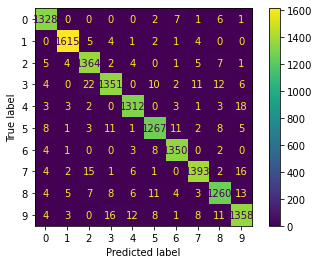

In [14]:
best_forest.confusion_matrix(save=True, file_name="random_forest_cm.png")

2022-12-21 10:12:53.043 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:121 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\rf_feat_importance.png


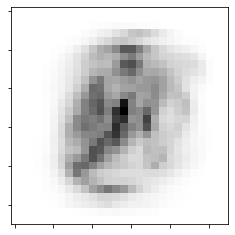

In [15]:
importance = best_forest.estimator.feature_importances_
pixels = chunks(lst=list(importance), n=28)
plot_digit(pixels=pixels, save=True, file_name='rf_feat_importance.png')

### Fool data

In [ ]:
from assignment_2.digits_classifiers.io import read_fool_dataset

fool = read_fool_dataset()
fool.drop(columns=always_zero, axis=1, inplace=True)

In [ ]:
best_forest.estimator.predict(X=fool)